In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.pyplot import figure
from scipy.stats import poisson
import pandas as pd
%matplotlib inline

In [130]:
def poisson_process_v1(seed = 0, T = 1, N = 100, rate = 10, X_0 = 0, paths = 1):
    #Idea: binomial approximation
    
    np.random.seed(seed)
    dt = T/N
    size = (paths, N+1)
    
    X = np.zeros(size)
    
    
    
    X = np.random.rand(size[0], size[1])
    
    
    for j in range(paths):    
        for i in range(1, N):
            if X[j, i] <= rate * dt:
                X[j, i] = 1

            else:
                X[j, i] = 0
    

    
    X[:, 0] = X_0
    
    X = np.cumsum(X, axis = 1)
#     print(X)
    time = np.arange(0, T + dt, dt)
    for i in range(paths):
        plt.plot(time, X[i, :], marker='o', drawstyle='steps-post')

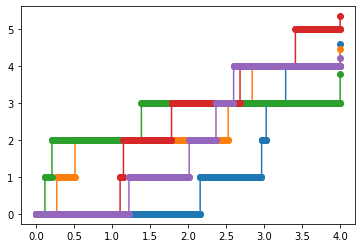

In [132]:
poisson_process_v1(T = 1, N = 1000, X_0 = 0, rate = 1, paths = 5)

In [128]:
def poisson_process_v2(seed = 0, X_0 = 0, lam = 3, events = 5, paths = 3):
    #Idea: Model via Inter-Arrival Times
    
    np.random.seed(seed)
    
    interarrival_periods = - np.log(1 - np.random.rand(paths, events+1) ) / lam
    
    interarrival_periods[:, 0] = X_0
    
    jump_time = interarrival_periods.cumsum(axis = 1)
        
    jump_chain = np.arange(0, events+1, 1)

    
    for i in range(paths):
        plt.plot(jump_time[i, :], jump_chain, marker='o', drawstyle='steps-post')

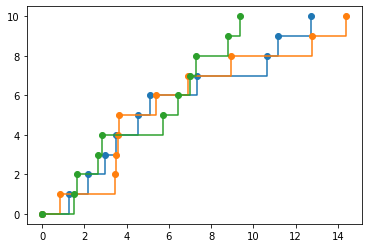

In [133]:
poisson_process_v2(lam = 1, events = 10, paths = 3)